# Feature Engineering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# setting format for readability
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
df = pd.read_pickle('../mod5project/pickle_files/cleaned_df')
print(df.shape)
df.head()

(5492, 121)


,PlayerName,Position,School,CombineYear,Height,Weight,_40yd,Vertical,Bench,BroadJump,_3Cone,Shuttle,Draft Team,Round,Pick,Draft Year,Defense_Games,Solo_Tackles,Assisted_Tackles,Ttl_Tackles,Loss,Sacks,Defensive_Interceptions,Def_Int_Yds,Yds_per_Int,Pick_6,Defended_Passes,Recovered_Fumbles,Rec_Fumbles_Yds,Fumbles_Returned_TD,Forced_Fumbles,Solo_TacklesperGame,Assisted_TacklesperGame,Ttl_TacklesperGame,LossperGame,SacksperGame,Defensive_InterceptionsperGame,Def_Int_YdsperGame,Pick_6perGame,Defended_PassesperGame,Recovered_FumblesperGame,Rec_Fumbles_YdsperGame,Fumbles_Returned_TDperGame,Forced_FumblesperGame,Passing_Games,Completions,Pass_Attempts,Completion_Percent,Pass_Yards,Pass_Yds_per_Attempt,Adj_Pass_Yds_per_Attempt,Pass_TDs,Pass_Interceptions,Passer_Rating,CompletionsperGame,Pass_AttemptsperGame,Pass_YardsperGame,Pass_TDsperGame,Pass_InterceptionsperGame,Rush_Rec_Games,Rush_Attempts,Rush_Yds,Rush_Yds_per_Attempt,Rush_TDs,Receptions,Rec_Yds,Rec_Yds_per_Reception,Rec_TDs,Plays_from_Scrimmage,Scrimmage_Yds,Scrimmage_Yds_per_Attempt,Scrimmage_TDs,Rush_AttemptsperGame,Rush_YdsperGame,Rush_TDsperGame,ReceptionsperGame,Rec_YdsperGame,Rec_TDsperGame,Plays_from_ScrimmageperGame,Scrimmage_YdsperGame,Scrimmage_TDsperGame,Kicking_Games,XP_Made,XP_Attempts,XP_Percent,FG_Made,FG_Attempts,FG_Percent,TTL_Kicking_Points,NumPunts,Punt_Yds,Yds_per_Punt,XP_MadeperGame,XP_AttemptsperGame,FG_MadeperGame,FG_AttemptsperGame,TTL_Kicking_PointsperGame,NumPuntsperGame,Punt_YdsperGame,PuntRet_Games,Kickoff_Returns,KO_Return_Yds,Yds_per_KO_Return,KO_Returned_for_TD,Kickoff_ReturnsperGame,KO_Return_YdsperGame,KO_Returned_for_TDperGame,Scoring_Games,TD_Other,Ttl_TDs,TwoPT_Conversion,Safety,TTL_Points,TD_OtherperGame,Ttl_TDsperGame,TwoPT_ConversionperGame,SafetyperGame,TTL_PointsperGame,Feet,Inches,Pos
0,Shaun Alexander,RB,Alabama,2000,72,218,4.58,17.23,9.70,59.13,3.53,2.13,Seattle Seahawks,1st,19th pick,2000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.09,0.00,0.00,0.00,11.00,302.00,1383.00,4.60,19.00,25.00,323.00,12.90,4.00,327.00,1706.00,5.20,23.00,27.45,125.73,1.73,2.27,29.36,0.36,29.73,155.09,2.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,24.00,0.00,0.00,144.00,0.00,2.18,0.00,0.00,13.09,72,0,Receivers
1,LaVar Arrington,OLB,Penn State,2000,75,250,4.53,17.25,11.27,58.80,3.57,2.14,Washington Redskins,1st,2nd pick,2000,12.00,0.00,0.00,0.00,0.00,0.00,1.00,27.00,27.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.08,2.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,72,3,LBs
2,John Baker,P,North Texas,2000,75,227,2.46,15.67,8.09,56.95,3.58,2.21,Not Drafted,Not Drafted,Not Drafted,Not Drafted,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,1.00,1.00,100.00,27.00,27.00,27.00,0.00,0.00,326.80,0.09,0.09,2.45,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,72,3,SpecialTeams
3,Anthony Becht,TE,West Virginia,2000,78,270,4.78,33.50,10.11,123.00,6.94,4.08,New York Jets,1st,27th pick,2000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,

As I noted in my EDA & Hypothesis Testing notebook, I have columns that return infinite values because my data was missing a 'Games' value. I want to drop these columns now to avoid issues later.

In [4]:
df.drop(columns = ['Solo_TacklesperGame', 'Assisted_TacklesperGame', 'Ttl_TacklesperGame', 'LossperGame', 
                   'SacksperGame', 'Defensive_InterceptionsperGame', 'Def_Int_YdsperGame', 'Pick_6perGame', 
                   'Defended_PassesperGame', 'Recovered_FumblesperGame', 'Rec_Fumbles_YdsperGame', 
                   'Fumbles_Returned_TDperGame', 'Forced_FumblesperGame', 'TD_OtherperGame', 'Ttl_TDsperGame', 
                   'TwoPT_ConversionperGame', 'SafetyperGame', 'TTL_PointsperGame'], inplace=True)
print(df.shape)
df.head()

(5492, 103)


,PlayerName,Position,School,CombineYear,Height,Weight,_40yd,Vertical,Bench,BroadJump,_3Cone,Shuttle,Draft Team,Round,Pick,Draft Year,Defense_Games,Solo_Tackles,Assisted_Tackles,Ttl_Tackles,Loss,Sacks,Defensive_Interceptions,Def_Int_Yds,Yds_per_Int,Pick_6,Defended_Passes,Recovered_Fumbles,Rec_Fumbles_Yds,Fumbles_Returned_TD,Forced_Fumbles,Passing_Games,Completions,Pass_Attempts,Completion_Percent,Pass_Yards,Pass_Yds_per_Attempt,Adj_Pass_Yds_per_Attempt,Pass_TDs,Pass_Interceptions,Passer_Rating,CompletionsperGame,Pass_AttemptsperGame,Pass_YardsperGame,Pass_TDsperGame,Pass_InterceptionsperGame,Rush_Rec_Games,Rush_Attempts,Rush_Yds,Rush_Yds_per_Attempt,Rush_TDs,Receptions,Rec_Yds,Rec_Yds_per_Reception,Rec_TDs,Plays_from_Scrimmage,Scrimmage_Yds,Scrimmage_Yds_per_Attempt,Scrimmage_TDs,Rush_AttemptsperGame,Rush_YdsperGame,Rush_TDsperGame,ReceptionsperGame,Rec_YdsperGame,Rec_TDsperGame,Plays_from_ScrimmageperGame,Scrimmage_YdsperGame,Scrimmage_TDsperGame,Kicking_Games,XP_Made,XP_Attempts,XP_Percent,FG_Made,FG_Attempts,FG_Percent,TTL_Kicking_Points,NumPunts,Punt_Yds,Yds_per_Punt,XP_MadeperGame,XP_AttemptsperGame,FG_MadeperGame,FG_AttemptsperGame,TTL_Kicking_PointsperGame,NumPuntsperGame,Punt_YdsperGame,PuntRet_Games,Kickoff_Returns,KO_Return_Yds,Yds_per_KO_Return,KO_Returned_for_TD,Kickoff_ReturnsperGame,KO_Return_YdsperGame,KO_Returned_for_TDperGame,Scoring_Games,TD_Other,Ttl_TDs,TwoPT_Conversion,Safety,TTL_Points,Feet,Inches,Pos
0,Shaun Alexander,RB,Alabama,2000,72,218,4.58,17.23,9.70,59.13,3.53,2.13,Seattle Seahawks,1st,19th pick,2000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.09,0.00,0.00,0.00,11.00,302.00,1383.00,4.60,19.00,25.00,323.00,12.90,4.00,327.00,1706.00,5.20,23.00,27.45,125.73,1.73,2.27,29.36,0.36,29.73,155.09,2.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,24.00,0.00,0.00,144.00,72,0,Receivers
1,LaVar Arrington,OLB,Penn State,2000,75,250,4.53,17.25,11.27,58.80,3.57,2.14,Washington Redskins,1st,2nd pick,2000,12.00,0.00,0.00,0.00,0.00,0.00,1.00,27.00,27.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12.00,0.00,0.00,0.00,0.00,0.00,72,3,LBs
2,John Baker,P,North Texas,2000,75,227,2.46,15.67,8.09,56.95,3.58,2.21,Not Drafted,Not Drafted,Not Drafted,Not Drafted,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,1.00,1.00,100.00,27.00,27.00,27.00,0.00,0.00,326.80,0.09,0.09,2.45,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,72,3,SpecialTeams
3,Anthony Becht,TE,West Virginia,2000,78,270,4.78,33.50,10.11,123.00,6.94,4.08,New York Jets,1st,27th pick,2000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,5.00,0.00,0.00,30.00,72,6,Receivers
4,Tom Brady,QB,Michigan,2000,76,211,5.28,24.50,9.61,99.00,7.20,4.38,New England Patriots,6th,199th pick,2000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,180.00,295.00,61.00,2217.00,7.50,7.70,16.00,6.00,138.00,16.36,26.82,201.55,1.45,0.55,11.00,34.00,-31.00,-0.90,1.00,0.00,0.00,0.0

Height
----------------------------------------
count   5492.00
mean      73.54
std        2.59
min       65.00
25%       72.00
50%       74.00
75%       75.00
max       82.00
Name: Height, dtype: float64

Average Height per Round
----------------------------------------
Round
1st           74.28
2nd           73.74
3rd           73.77
4th           73.50
5th           73.46
6th           73.41
7th           73.62
Not Drafted   73.18
Name: Height, dtype: float64



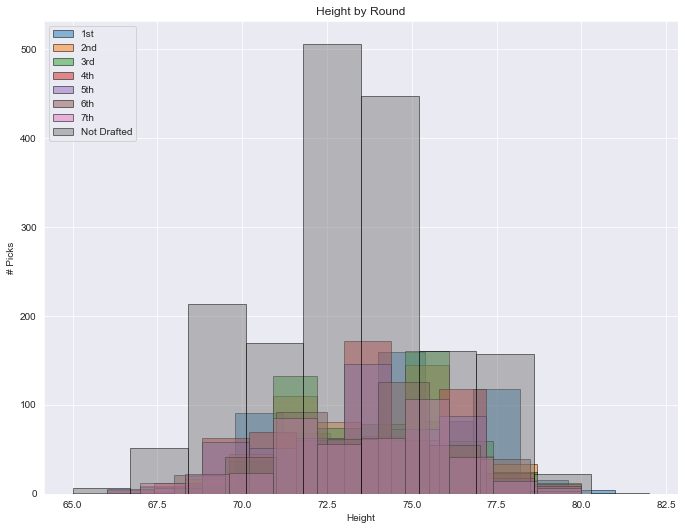

In [33]:
print("Height")
print("-"*40)
print(df.Height.describe())
print("")

print("Average Height per Round")
print("-"*40)
print(df.groupby(['Round']).Height.mean())
print("")

sns.set_style('darkgrid')
fig = plt.figure(figsize = (25,20))
fig.subplots_adjust(hspace = .30)

ax1 = fig.add_subplot(221)
ax1.hist(df[df['Round'] == '1st'].Height, bins = 10, label = '1st', alpha = .50,edgecolor= 'black')
ax1.hist(df[df['Round'] == '2nd'].Height, bins = 10, label = '2nd', alpha = .50, edgecolor = 'black')
ax1.hist(df[df['Round'] == '3rd'].Height, bins = 10, label = '3rd', alpha = .50, edgecolor = 'black')
ax1.hist(df[df['Round'] == '4th'].Height, bins = 10, label = '4th', alpha = .50, edgecolor = 'black')
ax1.hist(df[df['Round'] == '5th'].Height, bins = 10, label = '5th', alpha = .50, edgecolor = 'black')
ax1.hist(df[df['Round'] == '6th'].Height, bins = 10, label = '6th', alpha = .50, edgecolor = 'black')
ax1.hist(df[df['Round'] == '7th'].Height, bins = 10, label = '7th', alpha = .50, edgecolor = 'black')
ax1.hist(df[df['Round'] == 'Not Drafted'].Height, bins = 10, label = 'Not Drafted', alpha = .50, edgecolor = 'black')

ax1.set_title('Height by Round')
ax1.set_xlabel('Height')
ax1.set_ylabel('# Picks')
ax1.legend(loc = 'upper left')

plt.show()

It's hard to see, but there is a difference among the rounds and the average heights. 1st round picks are almost half an inch taller than all other rounds. I want to capute that in my data with a new feature.

In [32]:
df['DoesntLieonDatingApps'] = df['Height'] > 74
df['DoesntLieonDatingApps'].head()

0    False
1     True
2     True
3     True
4     True
Name: DoesntLieonDatingApps, dtype: bool

Weight
----------------------------------------
count   5492.00
mean      73.54
std        2.59
min       65.00
25%       72.00
50%       74.00
75%       75.00
max       82.00
Name: Height, dtype: float64

Average Weight per Round
----------------------------------------
Round
1st           247.20
2nd           239.65
3rd           241.80
4th           239.05
5th           237.49
6th           235.97
7th           238.16
Not Drafted   229.53
Name: Weight, dtype: float64



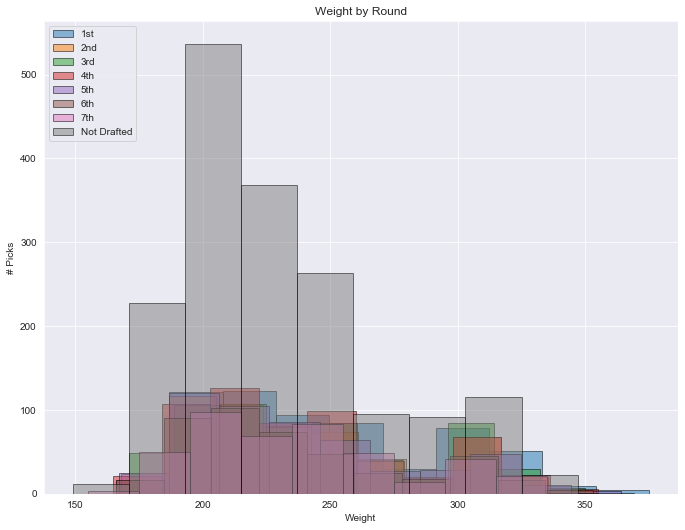

In [34]:
print("Weight")
print("-"*40)
print(df.Height.describe())
print("")

print("Average Weight per Round")
print("-"*40)
print(df.groupby(['Round']).Weight.mean())
print("")

sns.set_style('darkgrid')
fig = plt.figure(figsize = (25,20))
fig.subplots_adjust(hspace = .30)

ax1 = fig.add_subplot(221)
ax1.hist(df[df['Round'] == '1st'].Weight, bins = 10, label = '1st', alpha = .50,edgecolor= 'black')
ax1.hist(df[df['Round'] == '2nd'].Weight, bins = 10, label = '2nd', alpha = .50, edgecolor = 'black')
ax1.hist(df[df['Round'] == '3rd'].Weight, bins = 10, label = '3rd', alpha = .50, edgecolor = 'black')
ax1.hist(df[df['Round'] == '4th'].Weight, bins = 10, label = '4th', alpha = .50, edgecolor = 'black')
ax1.hist(df[df['Round'] == '5th'].Weight, bins = 10, label = '5th', alpha = .50, edgecolor = 'black')
ax1.hist(df[df['Round'] == '6th'].Weight, bins = 10, label = '6th', alpha = .50, edgecolor = 'black')
ax1.hist(df[df['Round'] == '7th'].Weight, bins = 10, label = '7th', alpha = .50, edgecolor = 'black')
ax1.hist(df[df['Round'] == 'Not Drafted'].Weight, bins = 10, label = 'Not Drafted', alpha = .50, edgecolor = 'black')

ax1.set_title('Weight by Round')
ax1.set_xlabel('Weight')
ax1.set_ylabel('# Picks')
ax1.legend(loc = 'upper left')

plt.show()

Again, theres a noticeable difference between the rounds and weight, particularly with those prospects who have not been drafted.

In [36]:
df['SmallestKidontheBlock'] = df['Weight'] < 230
df['SmallestKidontheBlock'].head()

0     True
1    False
2     True
3    False
4     True
Name: SmallestKidontheBlock, dtype: bool

Tackles for a Loss
----------------------------------------
count   5492.00
mean       2.74
std        4.89
min        0.00
25%        0.00
50%        0.00
75%        4.00
max       28.50
Name: Loss, dtype: float64

Average # of Tackles for a Loss per Round
----------------------------------------
Round
1st           3.96
2nd           3.35
3rd           3.45
4th           2.81
5th           2.80
6th           2.29
7th           2.50
Not Drafted   1.99
Name: Loss, dtype: float64



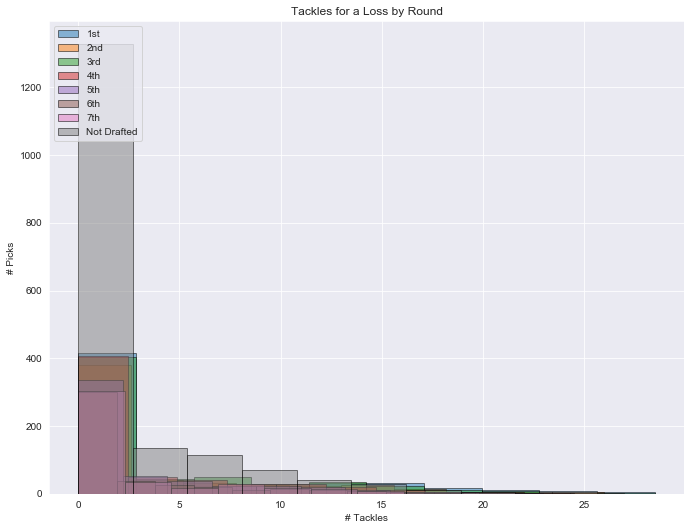

In [37]:
print("Tackles for a Loss")
print("-"*40)
print(df.Loss.describe())
print("")

print("Average # of Tackles for a Loss per Round")
print("-"*40)
print(df.groupby(['Round']).Loss.mean())
print("")

sns.set_style('darkgrid')
fig = plt.figure(figsize = (25,20))
fig.subplots_adjust(hspace = .30)

ax1 = fig.add_subplot(221)
ax1.hist(df[df['Round'] == '1st'].Loss, bins = 10, label = '1st', alpha = .50,edgecolor= 'black')
ax1.hist(df[df['Round'] == '2nd'].Loss, bins = 10, label = '2nd', alpha = .50, edgecolor = 'black')
ax1.hist(df[df['Round'] == '3rd'].Loss, bins = 10, label = '3rd', alpha = .50, edgecolor = 'black')
ax1.hist(df[df['Round'] == '4th'].Loss, bins = 10, label = '4th', alpha = .50, edgecolor = 'black')
ax1.hist(df[df['Round'] == '5th'].Loss, bins = 10, label = '5th', alpha = .50, edgecolor = 'black')
ax1.hist(df[df['Round'] == '6th'].Loss, bins = 10, label = '6th', alpha = .50, edgecolor = 'black')
ax1.hist(df[df['Round'] == '7th'].Loss, bins = 10, label = '7th', alpha = .50, edgecolor = 'black')
ax1.hist(df[df['Round'] == 'Not Drafted'].Loss, bins = 10, label = 'Not Drafted', alpha = .50, edgecolor = 'black')

ax1.set_title('Tackles for a Loss by Round')
ax1.set_xlabel('# Tackles')
ax1.set_ylabel('# Picks')
ax1.legend(loc = 'upper left')

plt.show()

In [38]:
df['SendEmBackwards'] = df['Loss'] > 3
df['SendEmBackwards'].head()

0    False
1    False
2    False
3    False
4    False
Name: SendEmBackwards, dtype: bool

Sacks
----------------------------------------
count   5492.00
mean       1.12
std        2.52
min        0.00
25%        0.00
50%        0.00
75%        1.00
max       20.00
Name: Sacks, dtype: float64

Average # of Sacks per Round
----------------------------------------
Round
1st           1.80
2nd           1.47
3rd           1.44
4th           1.12
5th           1.07
6th           0.84
7th           1.06
Not Drafted   0.74
Name: Sacks, dtype: float64



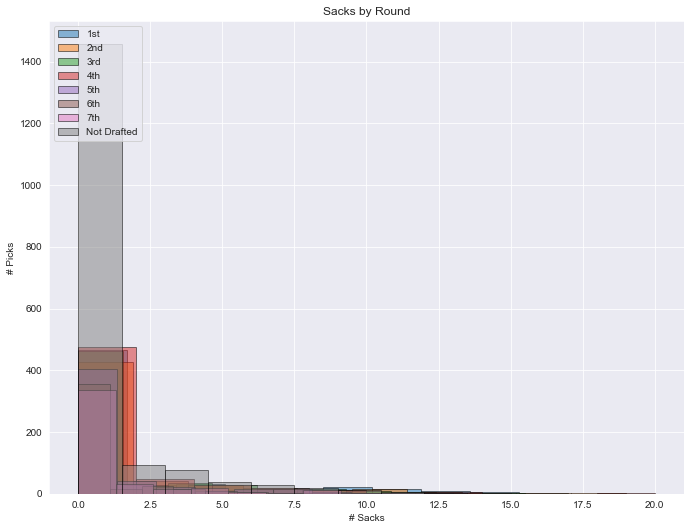

In [39]:
print("Sacks")
print("-"*40)
print(df.Sacks.describe())
print("")

print("Average # of Sacks per Round")
print("-"*40)
print(df.groupby(['Round']).Sacks.mean())
print("")

sns.set_style('darkgrid')
fig = plt.figure(figsize = (25,20))
fig.subplots_adjust(hspace = .30)

ax1 = fig.add_subplot(221)
ax1.hist(df[df['Round'] == '1st'].Sacks, bins = 10, label = '1st', alpha = .50,edgecolor= 'black')
ax1.hist(df[df['Round'] == '2nd'].Sacks, bins = 10, label = '2nd', alpha = .50, edgecolor = 'black')
ax1.hist(df[df['Round'] == '3rd'].Sacks, bins = 10, label = '3rd', alpha = .50, edgecolor = 'black')
ax1.hist(df[df['Round'] == '4th'].Sacks, bins = 10, label = '4th', alpha = .50, edgecolor = 'black')
ax1.hist(df[df['Round'] == '5th'].Sacks, bins = 10, label = '5th', alpha = .50, edgecolor = 'black')
ax1.hist(df[df['Round'] == '6th'].Sacks, bins = 10, label = '6th', alpha = .50, edgecolor = 'black')
ax1.hist(df[df['Round'] == '7th'].Sacks, bins = 10, label = '7th', alpha = .50, edgecolor = 'black')
ax1.hist(df[df['Round'] == 'Not Drafted'].Sacks, bins = 10, label = 'Not Drafted', alpha = .50, edgecolor = 'black')

ax1.set_title('Sacks by Round')
ax1.set_xlabel('# Sacks')
ax1.set_ylabel('# Picks')
ax1.legend(loc = 'upper left')

plt.show()

In [40]:
df['CatchTheQB'] = df['Sacks'] > 1.5
df['CatchTheQB'].head()

0    False
1    False
2    False
3    False
4    False
Name: CatchTheQB, dtype: bool

Total Kicking Points
----------------------------------------
count   5492.00
mean       1.49
std       12.30
min        0.00
25%        0.00
50%        0.00
75%        0.00
max      156.00
Name: TTL_Kicking_Points, dtype: float64

Average # of Kicking Points per Round
----------------------------------------
Round
1st           0.19
2nd           0.38
3rd           0.17
4th           0.50
5th           2.04
6th           1.85
7th           1.05
Not Drafted   2.96
Name: TTL_Kicking_Points, dtype: float64



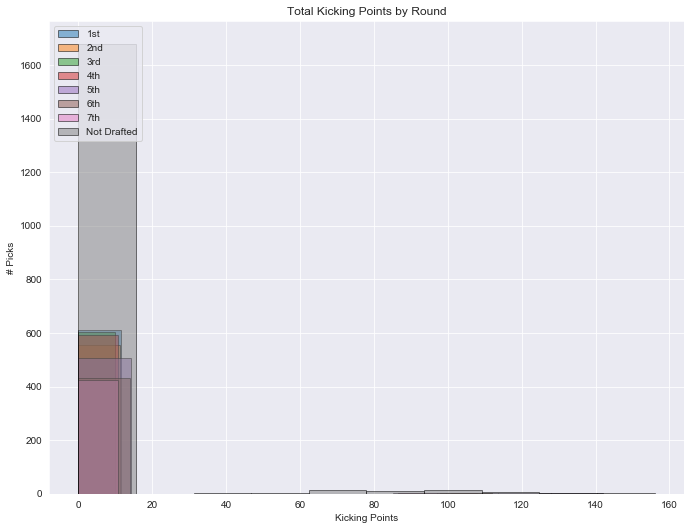

In [41]:
print("Total Kicking Points")
print("-"*40)
print(df.TTL_Kicking_Points.describe())
print("")

print("Average # of Kicking Points per Round")
print("-"*40)
print(df.groupby(['Round']).TTL_Kicking_Points.mean())
print("")

sns.set_style('darkgrid')
fig = plt.figure(figsize = (25,20))
fig.subplots_adjust(hspace = .30)

ax1 = fig.add_subplot(221)
ax1.hist(df[df['Round'] == '1st'].TTL_Kicking_Points, bins = 10, label = '1st', alpha = .50,edgecolor= 'black')
ax1.hist(df[df['Round'] == '2nd'].TTL_Kicking_Points, bins = 10, label = '2nd', alpha = .50, edgecolor = 'black')
ax1.hist(df[df['Round'] == '3rd'].TTL_Kicking_Points, bins = 10, label = '3rd', alpha = .50, edgecolor = 'black')
ax1.hist(df[df['Round'] == '4th'].TTL_Kicking_Points, bins = 10, label = '4th', alpha = .50, edgecolor = 'black')
ax1.hist(df[df['Round'] == '5th'].TTL_Kicking_Points, bins = 10, label = '5th', alpha = .50, edgecolor = 'black')
ax1.hist(df[df['Round'] == '6th'].TTL_Kicking_Points, bins = 10, label = '6th', alpha = .50, edgecolor = 'black')
ax1.hist(df[df['Round'] == '7th'].TTL_Kicking_Points, bins = 10, label = '7th', alpha = .50, edgecolor = 'black')
ax1.hist(df[df['Round'] == 'Not Drafted'].TTL_Kicking_Points, bins = 10, label = 'Not Drafted', alpha = .50, edgecolor = 'black')

ax1.set_title('Total Kicking Points by Round')
ax1.set_xlabel('Kicking Points')
ax1.set_ylabel('# Picks')
ax1.legend(loc = 'upper left')

plt.show()

In [42]:
df['NoRespect'] = df['TTL_Kicking_Points'] > 2
df['NoRespect'].head()

0    False
1    False
2    False
3    False
4    False
Name: NoRespect, dtype: bool

In [44]:
df.to_pickle('pickle_files/final_data')